<a href="https://colab.research.google.com/github/hyunjae97/2023S-Ajou-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd # 경로 조정 # 경로는 본인의 환경에 맞게 조절 가능

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [6]:
from google.colab import files 
uploaded = files.upload()

Saving train(1).csv to train(1).csv


In [10]:
import io 
data = pd.read_csv(io.BytesIO(uploaded['train(1).csv']))

In [12]:
df = pd.read_csv('./train(1).csv')

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [14]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [15]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

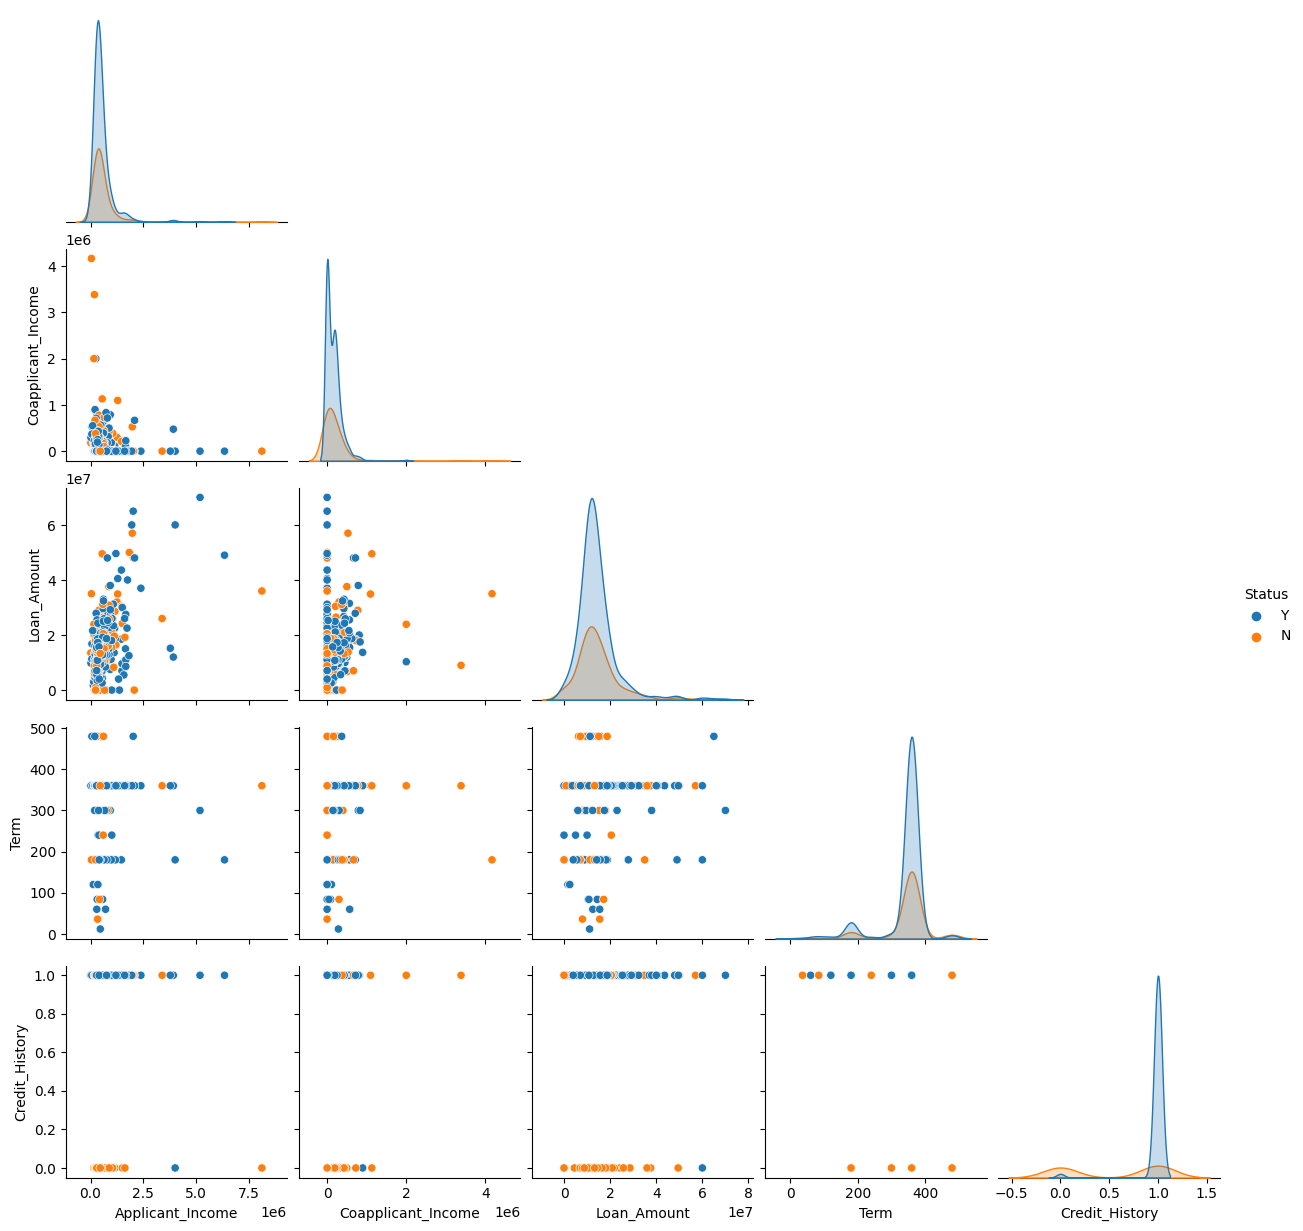

In [17]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

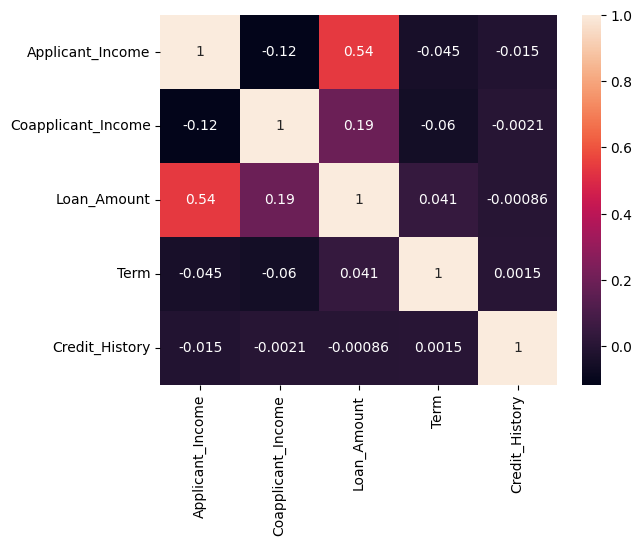

In [18]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [19]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  


*   'Credit_History'열에 있는 결측값도 함께 제거합니다.

참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.




In [36]:
## 문제 1 ##
# 코드 작성
df[['Gender','Married','Dependents','Self_Employed','Credit_History']].dropna()

### categorical feature 중('Gender','Married','Dependents','Self_Employed','Credit_History') 결측값이 있는 행을 삭제

,Gender,Married,Dependents,Self_Employed,Credit_History
0,Male,No,0,No,1.0
1,Male,Yes,1,No,1.0
2,Male,Yes,0,Yes,1.0
3,Male,Yes,0,No,1.0
4,Male,No,0,No,1.0
...,...,...,...,...,...
609,Female,No,0,No,1.0
610,Male,Yes,3+,No,1.0
611,Male,Yes,1,No,1.0
612,Male,Yes,2,No,1.0


## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [31]:
from sklearn.preprocessing import LabelEncoder

In [51]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Area',
 'Status']

In [73]:
## 문제 2 ##
# 코드 작성

encoder = LabelEncoder()



encoder.fit(df.Gender)

labels_Gender = encoder.transform(df.Gender)

labels_Gender 

df['Gender'] = labels_Gender ### Gender Female = 0 / Male = 1 / Nan = 2 로 바꼈음



encoder.fit(df.Married)

labels_Married = encoder.transform(df.Married)

df['Married'] = labels_Married




encoder.fit(df.Dependents)

labels_Dependents = encoder.transform(df.Dependents)

df['Dependents'] = labels_Dependents




encoder.fit(df.Education)

labels_Education = encoder.transform(df.Education)

df['Education'] = labels_Education




encoder.fit(df.Self_Employed)

labels_Self_Employed = encoder.transform(df.Self_Employed)

df['Self_Employed'] = labels_Self_Employed




encoder.fit(df.Area)

labels_Area = encoder.transform(df.Area)

df['Area'] = labels_Area




encoder.fit(df.Status)

labels_Status = encoder.transform(df.Status)

df['Status'] = labels_Status
##########

In [74]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.


* categorical feature와 imputer를 적용하려고 하는 feature(term)를 제외하고, 나머지 numerical feature에 대해서 normalization을 수행한 다음 imputation을 진행해주세요. (imputation을 할 때에만 normalized된 feature들을 사용합니다)
* **주의)** 'Credit_History'는 categorical feature로 간주하여야 합니다.
* term의 결측치를 채울 때에는 'normalized_df'를 사용하고 원본 데이터프레임의 'term' 열만 knn imputer로 결측치를 채운 'term'열로 변경합니다.
* 문제3번 이후 문제에서는 term의 결측치를 채운 변경된 df를 이용합니다.



### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 참고) 거리를 구할 때 데이터에 null 값이 있으면 거리가 nan으로 계산이 됩니다. 따라서 null인 데이터가 있는 행을 제외하고 거리를 계산하거나 모든 거리를 계산하고 nan 을 가진 데이터는 k개를 고를 때 제외해주시면 됩니다.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [135]:
import tqdm

In [137]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X
  
  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명

    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
      
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################

        d = sorted(distance.items(),key=lambda x:x[1]) #정렬(오름차순)
        labels = [] ### labels 리스트 생성 (k개의 label)
        for (c1,c2) in d: ### 딕셔너리의 index를 통해 반복문을 사용하여 y값을 labels에 추가
            labels.append(self.y[c1])

        labels = labels[:self.k] ### labels를 k개로 슬라이싱 = 평균

  
    return y_pred
        ################ 코드 끝  ######################
        ##############################################

        
  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0]

    X = X.drop([feat_name], axis=1)
    y = y.drop([feat_name])
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):
    
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################

          df = X.iloc[i]-y ### 1(값 뺄셈)
          df = np.power(df,2) ### 2(제곱)
          df2=df.sum() ### 3(데이터들의 제곱의 합)
          df2=np.sqrt(df2) ### 4(제곱근 처리)
          dist_dict[i]=df2 ### 딕셔너리에 값 추가

          return dist_dict
    ################ 코드 끝  ######################
    ##############################################
  


In [138]:
# 아래 숫자는 변경하셔도 상관 없습니다.
imputer = Knn_imputer(3)
imputer.fit(df)

# test set에 대해 predict를 진행합니다.
imputer.predict(df, 'Term')

  3%|▎         | 19/614 [00:00<00:00, 3551.17it/s]


AttributeError: ignored

In [139]:
encoder.fit(df.Term)

labels_Term = encoder.transform(df.Term)

df['Term'] = labels_Term

In [140]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술
:

자기 자신을 제외한 값들중 절댓값이 가장 큰 Credit_History가 가장 영향을 준다.

<Axes: title={'center': 'Correlation Heatmap'}>

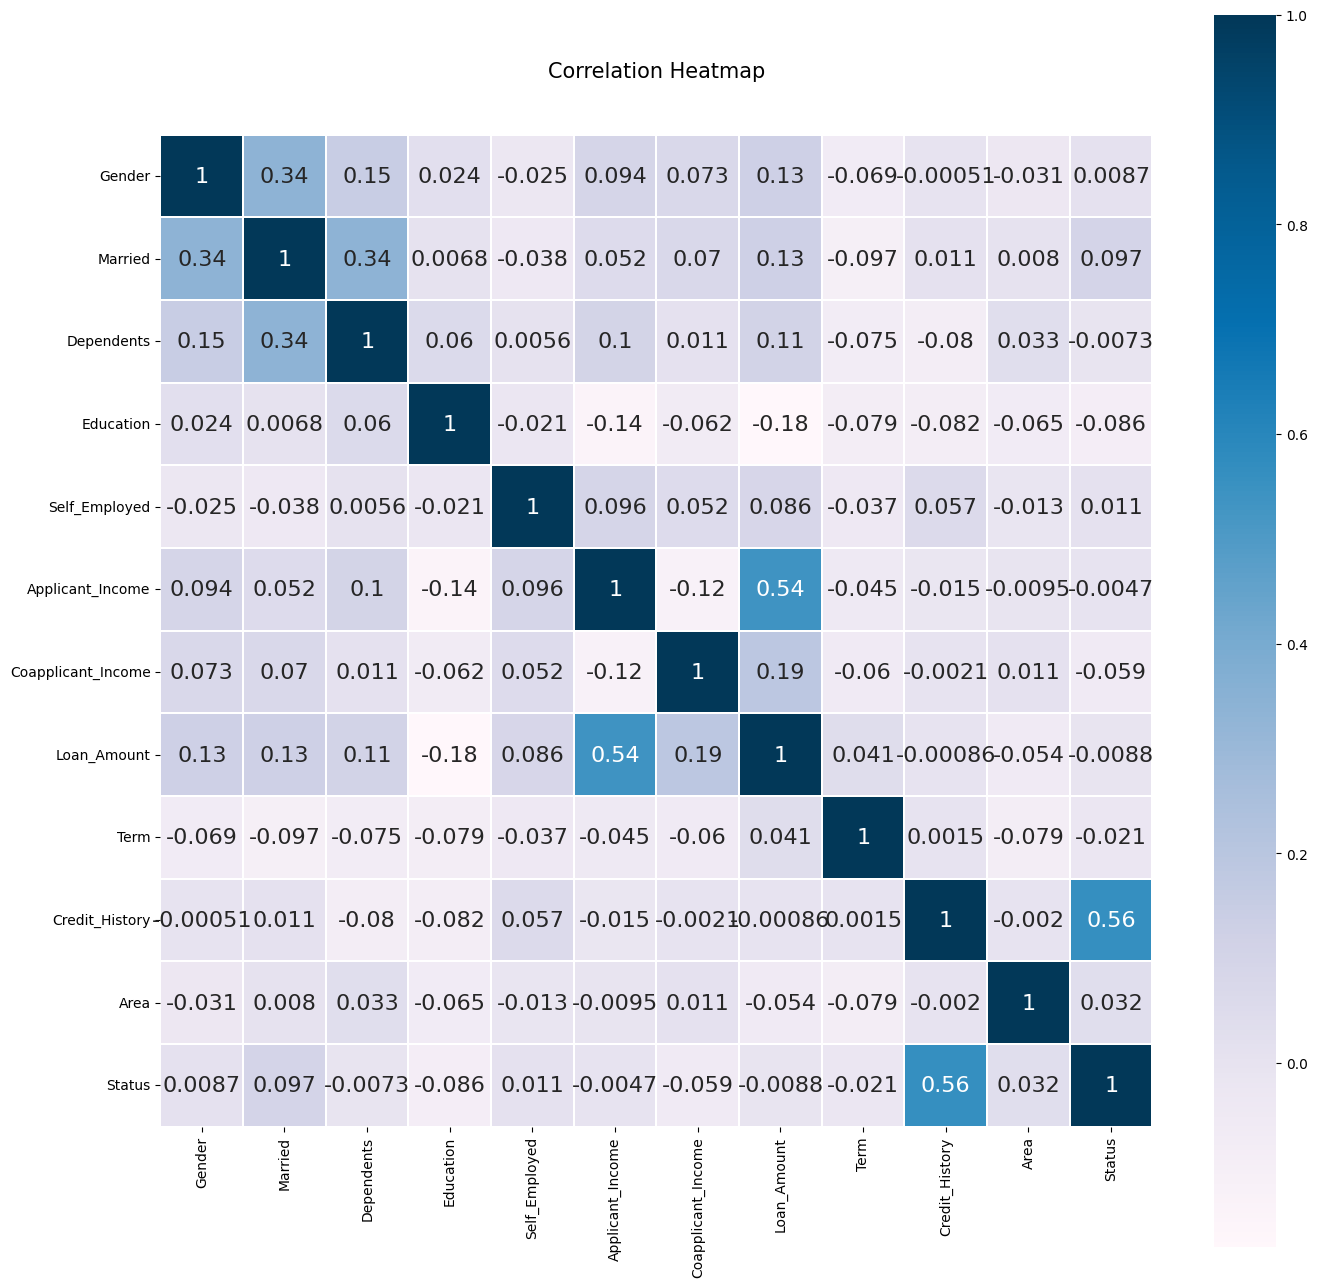

In [95]:
plt.figure(figsize = (16,16)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성
df.corr()

colormap = plt.cm.PuBu
plt.title("Correlation Heatmap", y = 1.05, size = 15)
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [118]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (490, 11)
y_train's shape :  (490,)

X_val's shape :  (62, 11)
y_val's shape :  (62,)

X_test's shape :  (62, 11)
y_test's shape :  (62,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [141]:
### 문제 1 ###
### 코드 작성 ###
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

k_list = range(1,11)

### train과 valid accuracy를 담을 리스트 선언
train_acc = []
valid_acc = []
train_acc2 = []
valid_acc2 = []


for k in k_list: ### k의 값을 1~10까지
    knn = KNeighborsClassifier(n_neighbors=k, p=2) ### 모델 정의
    knn.fit(X_train, y_train)
    valid_acc.append(knn.score(X_val, y_val)) ### valid 정확도 계산
    train_acc.append(knn.score(X_train,y_train)) ### train 정확도 계산

plt.plot(k_list,train_acc,label='train accuracy')
plt.plot(k_list,valid_acc,label='valid accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Euclidean distance")
plt.show()

for k in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=k, p=1) ### 모델 정의
    knn2.fit(X_train, y_train) 
    valid_acc2.append(knn2.score(X_val, y_val)) ### valid 정확도 계산
    train_acc2.append(knn2.score(X_train,y_train)) ### train 정확도 계산
    
plt.plot(k_list,train_acc2,label='train accuracy')
plt.plot(k_list,valid_acc2,label='valid accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Manhattan distance")
plt.legend()
plt.show()

### 최적 파라미터인 k=3으로 test accuracy 계산
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
result=classifier.predict(X_test)
accuracy_score(y_test,result)
################

ValueError: ignored

**설명 작성**  
- 최적의 파라미터: ??
- 설명: k = 1 에서부터 10 까지 대입했을때 유클리드 거리 척도랑 맨해튼 거리척도 중 valid accuracy가 가장 높게 나온 k 값이 최적의 파라미터일 것이다.

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [123]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [142]:
## 문제 6-1 ##
# 코드 작성

############

**설명 작성**  
- 최적의 파라미터: ??
- 설명: 평균 정확도가 가장 높게 나온 max_depth가 최적의 파라미터일 것이다.

In [143]:
## 문제 6-2 ##
# 코드 작성


############

**설명 작성**  
- 최적의 파라미터:
- 설명:

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


In [ ]:
## 문제 7-1 ##
# 코드 작성

############

In [ ]:
## 문제 7-2 ##
# 코드 작성

############

**7-3 설명 작성**  
- 설명:

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [145]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [151]:
## 문제 8-1 ##
## 코드 작성 ##
cross_val_df,test_df = train_test_split(df,test_size = 0.1,random_state = 1)

rfc = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = rfc,cv = 5, param_grid = param_grid)

grid_search.fit(cross_val_df.drop('Status', axis = 1),cross_val_df['Status'])

scores_df = pd.DataFrame(grid_search.cv_results_)
############

ValueError: ignored

### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
## 문제 8-2 ##
## 코드 작성 ##

############